In [3]:
!pip install Cython
!pip install git+git://github.com/scikit-learn/scikit-learn.git

  Cloning git://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-nzdfvbg5
  Running command git clone -q git://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-nzdfvbg5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn: filename=scikit_learn-1.0.dev0-cp37-cp37m-linux_x86_64.whl size=18035845 sha256=ecaf2c0fbe8f4b738f97b9f02497875f09f2cdcbbd2b32abc261f633709b5038
  Stored in directory: /tmp/pip-ephem-wheel-cache-jcqo2rba/wheels/a1/50/0e/316ef2ff8d4cfade292bd20b49efda94727688a153382745a6
Successfully built scikit-learn
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
from google.colab import files
uploaded = files.upload()

Saving framingham_heart_disease.csv to framingham_heart_disease.csv


In [6]:
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['framingham_heart_disease.csv']))


In [7]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
print(data.isna().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [9]:
df = data.dropna()
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [11]:
X = df.drop(columns='TenYearCHD')
y = df['TenYearCHD']

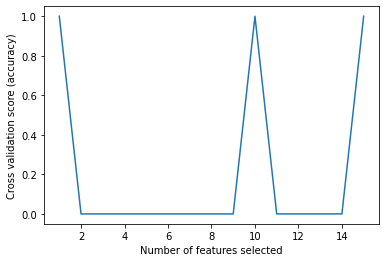

In [42]:
# Feature selection
clf = SVC(kernel='rbf')
fs_results = SequentialFeatureSelector(clf,
                                       n_features_to_select=3,
                                       direction='forward',
                                       scoring='accuracy',
                                       cv=5,
                                       n_jobs=1)
fs_results.fit(X, y)

plt.figure()
plt.plot(range(1, len(fs_results.get_support())+1), fs_results.get_support())
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

In [39]:
fs_results.get_support()

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True])

### **Model_1**

In [45]:
## MODEL CONSTRUCTION
X_data = X.iloc[:, [0,9,14]]
y_data = y
train_X, X_test, train_y, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state=30)

In [46]:
X_data

,male,totChol,glucose
0,1,195.0,77.0
1,0,250.0,76.0
2,1,245.0,70.0
3,0,225.0,103.0
4,0,285.0,85.0
...,...,...,...
4233,1,313.0,86.0
4234,1,207.0,68.0
4237,0,269.0,107.0
4238,1,185.0,72.0


In [55]:
# setup CV function
num_folds = 5
num_repeats = 15
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=24)

cv_results = pd.DataFrame(columns=['iteration', 'fold', 'training accuracy', 'validation accuracy'])
this_fold_num = 1
this_iteration_num = 1
for train_index, valid_index in rskf.split(train_X, train_y):
  #split data into training and validation set
  X_train, X_valid = train_X.iloc[train_index], train_X.iloc[valid_index]
  y_train, y_valid = train_y.iloc[train_index], train_y.iloc[valid_index]

  #classify the training data
  clf = SVC(kernel='rbf')
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_valid)
  acc_valid = metrics.accuracy_score(y_pred, y_valid)

  y_pred_train = clf.predict(X_train)
  acc_train = metrics.accuracy_score(y_pred_train, y_train)

  cv_results = cv_results.append({
      'iteration': this_iteration_num,
      'fold': this_fold_num,
      'training accuracy': acc_train,
      'validation accuracy': acc_valid
  }, ignore_index=True)

  #iteration and fold counter logic
  if this_fold_num == num_folds:
    this_fold_num = 1
    this_iteration_num = this_iteration_num + 1
  else:
    this_fold_num = this_fold_num + 1

In [56]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iteration            75 non-null     float64
 1   fold                 75 non-null     float64
 2   training accuracy    75 non-null     float64
 3   validation accuracy  75 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [57]:
cv_results.head()

,iteration,fold,training accuracy,validation accuracy
0,1.0,1.0,0.846399,0.846995
1,1.0,2.0,0.848222,0.845173
2,1.0,3.0,0.846855,0.843352
3,1.0,4.0,0.846469,0.846715
4,1.0,5.0,0.847836,0.844891


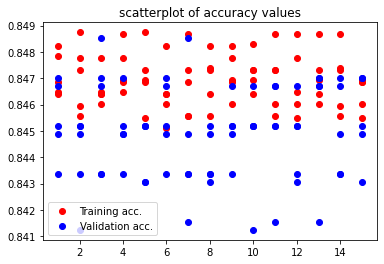

In [58]:
#plotting
plt.scatter(x=cv_results['iteration'], y=cv_results['training accuracy'], c='red', label='Training acc.')
plt.scatter(x=cv_results['iteration'], y=cv_results['validation accuracy'], c='blue', label='Validation acc.')
plt.title("scatterplot of accuracy values")
plt.legend()
plt.show()

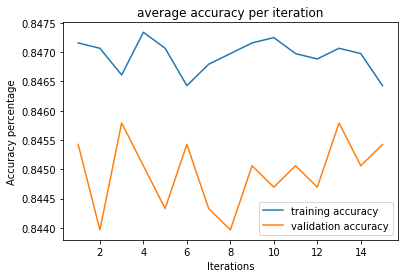

In [59]:
cv_results.groupby(['iteration']).mean().plot(kind='line', y=['training accuracy', 'validation accuracy'])
plt.title("average accuracy per iteration")
plt.xlabel("Iterations")
plt.ylabel("Accuracy percentage")
plt.show()

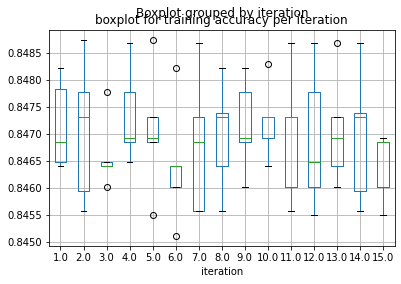

In [60]:
cv_results.boxplot(column=['training accuracy'], by='iteration')
plt.title("boxplot for training accuracy per iteration")
plt.show()

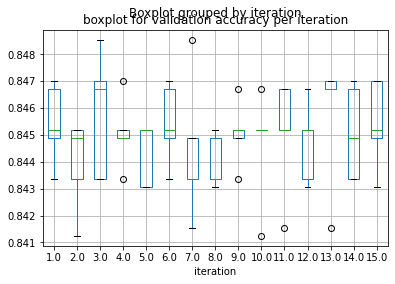

In [61]:
cv_results.boxplot(column=['validation accuracy'], by='iteration')
plt.title("boxplot for validation accuracy per iteration")
plt.show()

In [76]:
# test data
clf_final = SVC(kernel='rbf')
clf_final.fit(train_X, train_y)
predictions = clf_final.predict(X_test)
test_acc = metrics.accuracy_score(predictions, y_test)
print(test_acc)

0.8557377049180328


### **Model_2**

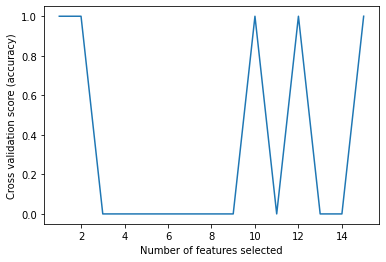

In [63]:
# Feature selection
clf = SVC(kernel='rbf')
fs_results = SequentialFeatureSelector(clf,
                                       n_features_to_select=5,
                                       direction='forward',
                                       scoring='accuracy',
                                       cv=5,
                                       n_jobs=1)
fs_results.fit(X, y)

plt.figure()
plt.plot(range(1, len(fs_results.get_support())+1), fs_results.get_support())
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.show()

In [64]:
fs_results.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True])

In [65]:
## MODEL CONSTRUCTION
X2_data = X.iloc[:, [0,1,9,11,14]]
y2_data = y
train_X2, X2_test, train_y2, y2_test = train_test_split(X2_data, y2_data, test_size = 0.25, random_state=30)

In [66]:
X2_data

,male,age,totChol,diaBP,glucose
0,1,39,195.0,70.0,77.0
1,0,46,250.0,81.0,76.0
2,1,48,245.0,80.0,70.0
3,0,61,225.0,95.0,103.0
4,0,46,285.0,84.0,85.0
...,...,...,...,...,...
4233,1,50,313.0,92.0,86.0
4234,1,51,207.0,80.0,68.0
4237,0,52,269.0,83.0,107.0
4238,1,40,185.0,98.0,72.0


In [67]:
# setup CV function
num_folds = 5
num_repeats = 15
rskf = RepeatedStratifiedKFold(n_splits=num_folds, n_repeats=num_repeats, random_state=35)

cv2_results = pd.DataFrame(columns=['iteration', 'fold', 'training accuracy', 'validation accuracy'])
this_fold_num = 1
this_iteration_num = 1
for train_index, valid_index in rskf.split(train_X2, train_y2):
  #split data into training and validation set
  X2_train, X2_valid = train_X2.iloc[train_index], train_X2.iloc[valid_index]
  y2_train, y2_valid = train_y2.iloc[train_index], train_y2.iloc[valid_index]

  #classify the training data
  clf = SVC(kernel='rbf')
  clf.fit(X2_train, y2_train)

  y2_pred = clf.predict(X2_valid)
  acc_valid = metrics.accuracy_score(y2_pred, y2_valid)

  y2_pred_train = clf.predict(X2_train)
  acc_train = metrics.accuracy_score(y2_pred_train, y2_train)

  cv2_results = cv2_results.append({
      'iteration': this_iteration_num,
      'fold': this_fold_num,
      'training accuracy': acc_train,
      'validation accuracy': acc_valid
  }, ignore_index=True)

  #iteration and fold counter logic
  if this_fold_num == num_folds:
    this_fold_num = 1
    this_iteration_num = this_iteration_num + 1
  else:
    this_fold_num = this_fold_num + 1

In [68]:
cv2_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   iteration            75 non-null     float64
 1   fold                 75 non-null     float64
 2   training accuracy    75 non-null     float64
 3   validation accuracy  75 non-null     float64
dtypes: float64(4)
memory usage: 2.5 KB


In [69]:
cv2_results.head()

,iteration,fold,training accuracy,validation accuracy
0,1.0,1.0,0.847767,0.845173
1,1.0,2.0,0.847311,0.845173
2,1.0,3.0,0.846855,0.845173
3,1.0,4.0,0.846469,0.841241
4,1.0,5.0,0.846469,0.846715


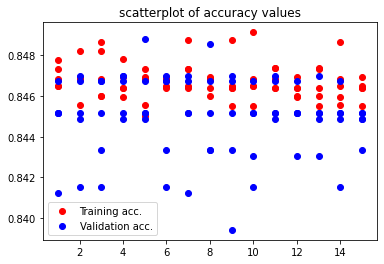

In [70]:
#plotting
plt.scatter(x=cv2_results['iteration'], y=cv2_results['training accuracy'], c='red', label='Training acc.')
plt.scatter(x=cv2_results['iteration'], y=cv2_results['validation accuracy'], c='blue', label='Validation acc.')
plt.title("scatterplot of accuracy values")
plt.legend()
plt.show()

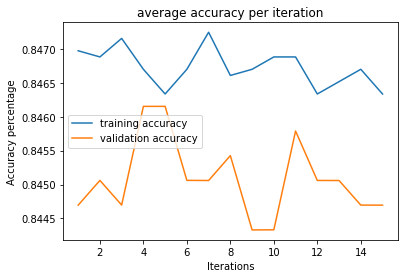

In [71]:
cv2_results.groupby(['iteration']).mean().plot(kind='line', y=['training accuracy', 'validation accuracy'])
plt.title("average accuracy per iteration")
plt.xlabel("Iterations")
plt.ylabel("Accuracy percentage")
plt.show()

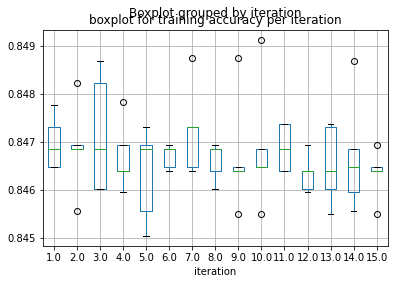

In [72]:
cv2_results.boxplot(column=['training accuracy'], by='iteration')
plt.title("boxplot for training accuracy per iteration")
plt.show()

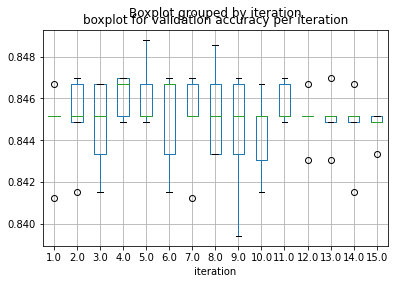

In [73]:
cv2_results.boxplot(column=['validation accuracy'], by='iteration')
plt.title("boxplot for validation accuracy per iteration")
plt.show()

In [75]:
# test data
clf_final = SVC(kernel='rbf')
clf_final.fit(train_X2, train_y2)
predictions2 = clf_final.predict(X2_test)
test2_acc = metrics.accuracy_score(predictions2, y2_test)
print(test2_acc)

0.8557377049180328
